<a href="https://colab.research.google.com/github/Keerthana826/Zomato-Data-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Zomato Restaurant Clustering and Sentiment Analysis**

Description: This project focuses on Customers and Company, we have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of visualizations. Also, cluster the zomato restaurants into different segments. The data is visualized as it becomes easy to analyse data at instant. The analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. The data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. The metadata of reviewers can be used for identifying the critics in the industry.

###Data Description

Restaurant Data

1.Name: Name of Restaurants

2.Links: URL Links of Restaurants

3.Cost: Per person estimated cost of dining

4.Collection: Tagging of Restaurants w.r.t Zomato categories

5.Cuisines: Cusisines served by restaurants

6.Timings: Restaurant timings


Review Data

1.Reviewer: Name of the reviewer

2.Review: Review text

3.Rating: Rating provided

4.MetaData: Reviewer metadata-No of reviews and followers

5.Time: Date and Time of Review

6.Pictures: No of pictures posted with reviews

###Loading the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the dataset
rst_names= pd.read_csv('/content/drive/MyDrive/Zomato/Zomato Restaurant names and Metadata (1).csv')

In [ ]:
rst_reviews= pd.read_csv('/content/drive/MyDrive/Zomato/Zomato Restaurant reviews (1).csv')

In [ ]:
rst_names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
rst_names.shape

(105, 6)

In [ ]:
rst_reviews.shape

(10000, 7)

In [ ]:
rst_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
rst_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
rst_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
rst_names.count()

Name           105
Links          105
Cost           105
Collections     51
Cuisines       105
Timings        104
dtype: int64

In [ ]:
rst_reviews.count()

Restaurant    10000
Reviewer       9962
Review         9955
Rating         9962
Metadata       9962
Time           9962
Pictures      10000
dtype: int64

In [ ]:
rst_names.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
rst_reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

###Data info about missing/null values- Restaurant

In [ ]:
rst_names.rename(columns= {'Name':'Restaurant'}, inplace=True)

In [ ]:
rst_names.shape

(105, 6)

In [ ]:
#removing comma in cost column
cost_int = [int(item.replace(',', '')) for item in rst_names['Cost']]

In [ ]:
#Adding new column
rst_names['Cost_int']= cost_int

In [ ]:
del rst_names['Cost']

In [ ]:
del rst_names['Links']

In [ ]:
rst_names.dtypes

Restaurant     object
Collections    object
Cuisines       object
Timings        object
Cost_int        int64
dtype: object

In [ ]:
#checking missing values
rst_names.isnull().sum()

Restaurant      0
Collections    54
Cuisines        0
Timings         1
Cost_int        0
dtype: int64

In [ ]:
rst_names = rst_names.drop('Timings', axis=1)

In [ ]:
rst_names['Cuisines'].value_counts()

North Indian, Chinese                                   4
North Indian                                            3
Ice Cream, Desserts                                     2
Biryani, North Indian, Chinese                          2
South Indian, North Indian, Chinese                     2
                                                       ..
Biryani, South Indian, North Indian, Chinese, Andhra    1
Italian, North Indian, South Indian, Asian              1
North Indian, Fast Food                                 1
Arabian, North Indian, Chinese                          1
Thai, Asian, Chinese, Malaysian                         1
Name: Cuisines, Length: 92, dtype: int64

###Data info about missing/null values- Reviews

In [ ]:
rst_reviews.shape

(10000, 7)

In [ ]:
rst_reviews.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [ ]:
#converting object datatype to datetime datatype
rst_reviews['Time']= pd.to_datetime(rst_reviews['Time'])

In [ ]:
rst_reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
#Hanlding missing values for Rating column
missing_values=['Like']
rst_reviews = rst_reviews.replace(missing_values,np.NaN)
rst_reviews['Rating'] = rst_reviews['Rating'].fillna(method='ffill')

In [ ]:
rst_reviews['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5'], dtype=object)

In [ ]:
rst_reviews['Rating']= rst_reviews['Rating'].astype("float64")

### Data Description

In [ ]:
rst_names.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost_int,105.0,861.428571,510.14973,150.0,500.0,700.0,1200.0,2800.0


In [ ]:
rst_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10000.0,3.6064,1.483071,1.0,3.0,4.0,5.0,5.0
Pictures,10000.0,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


In [ ]:
final_df = pd.merge(rst_reviews, rst_names, on= 'Restaurant')

In [ ]:
final_df.drop(['Reviewer'], axis=1, inplace=True)

In [ ]:
final_df['Review']

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 10000, dtype: object

In [ ]:
final_df['No of reviews'] = final_df['Metadata'].str.split().str[0]

In [ ]:
final_df.rename(columns = {'Collections': 'Rest_type'}, inplace = True)

In [ ]:
final_df = final_df.drop(['Metadata','Time','Pictures'], axis=1)

##EDA

###Restaurant Analysis

In [ ]:
pd.cut(final_df['Rating'], bins=3).value_counts(sort=False)

(0.996, 2.333]    2428
(2.333, 3.667]    1259
(3.667, 5.0]      6313
Name: Rating, dtype: int64

In [ ]:
labels = ['below the average','average','great']
final_df['rating_group'] = pd.cut(final_df['Rating'], bins=3, labels=labels)

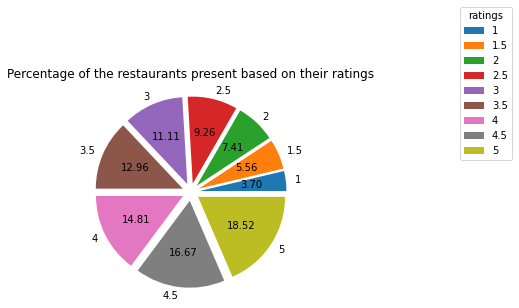

In [ ]:
import matplotlib.pyplot as plt
y = np.unique(final_df['Rating'])
mylabels = [1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.pie(y,labels=mylabels, autopct='%.2f', explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title='ratings',bbox_to_anchor=(2,1),loc='right')
plt.title('Percentage of the restaurants present based on their ratings')
plt.show()

###Cuisines 


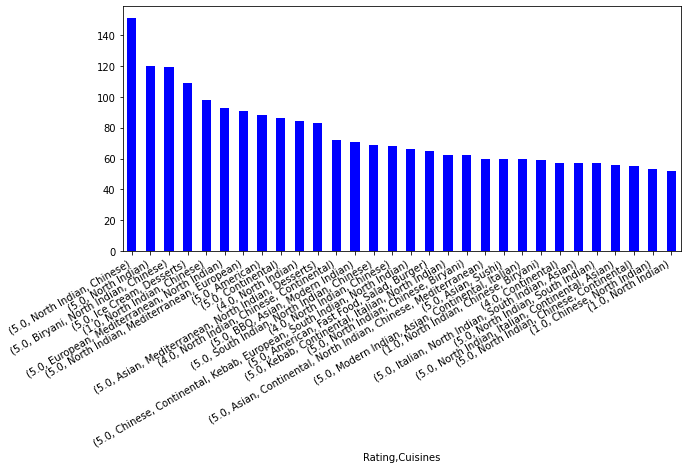

In [ ]:
plt.figure(figsize=(10,5))
final_df.groupby('Rating')['Cuisines'].value_counts().nlargest(30).plot.bar(color='blue')
plt.gcf().autofmt_xdate()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular cuisines')

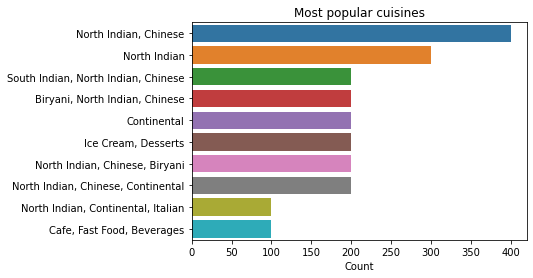

In [ ]:
cuisines = final_df['Cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines")

In [ ]:
cuisine_value_list = rst_names.Cuisines.str.split(', ')

In [ ]:
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [ ]:
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [ ]:
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


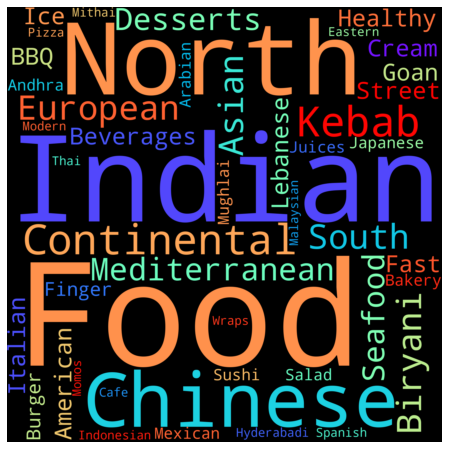

In [ ]:
from wordcloud import WordCloud
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

###Cost Analysis
What is the price range repartition of restaurants

In [ ]:
number_rest = final_df['Restaurant'].value_counts(dropna=False)
total_rest = number_rest.sum()

In [ ]:
pd.cut(final_df['Cost_int'], bins=4).value_counts(sort=False)

(147.35, 812.5]     5900
(812.5, 1475.0]     2600
(1475.0, 2137.5]    1300
(2137.5, 2800.0]     200
Name: Cost_int, dtype: int64

In [ ]:
pricerange = ['low','mid','high', 'very high']
final_df['price_range'] = pd.cut(final_df['Cost_int'], bins=4, labels=pricerange)

In [ ]:
pricerange_count = final_df.groupby('price_range')['Restaurant'].count()
print(pricerange_count)

price_range
low          5900
mid          2600
high         1300
very high     200
Name: Restaurant, dtype: int64


In [ ]:
#Dataframe of count of global restaurants by price range
pricerange_count = pd.DataFrame({'Restaurants': pricerange_count})
pricerange_count['percent'] = pricerange_count['Restaurants'] / total_rest
pricerange_count.index.names = ['Price Range']
pricerange_count.index = ['low_range', 'mid_range', 'high_range', 'expensive']
print(pricerange_count)

            Restaurants  percent
low_range          5900     0.59
mid_range          2600     0.26
high_range         1300     0.13
expensive           200     0.02


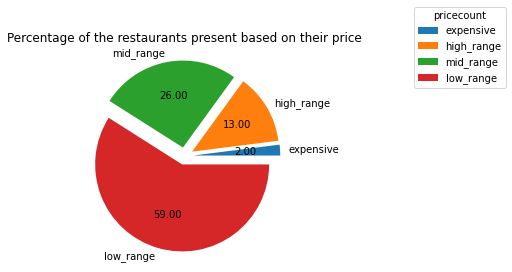

In [ ]:
y = np.unique(pricerange_count['Restaurants']) 
plabels = ['expensive','high_range','mid_range','low_range']
plt.pie(y,labels=plabels, autopct='%.2f', explode=(0.1,0.1,0.1,0.1)) 
plt.legend(title='pricecount',bbox_to_anchor=(2,1),loc='right') 
plt.title('Percentage of the restaurants present based on their price')
plt.show()

###Cost and Rating

In [ ]:
hotel = rst_names.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(rst_reviews, on = 'Restaurant')
merged.shape

(10000, 10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


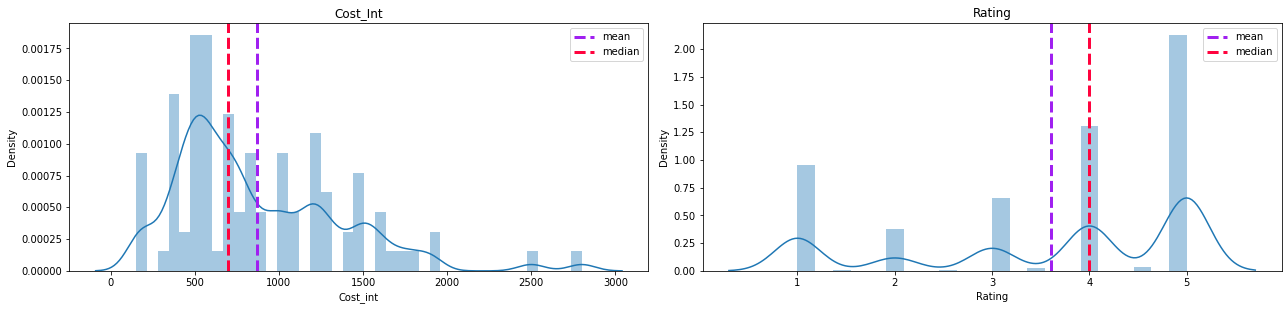

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost_int','Rating']) :
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col]);
    feature = merged[col]
    plt.axvline(feature.mean(),color='#A020F0', linestyle='dashed', linewidth=3,label= 'mean');  
    plt.axvline(feature.median(), color='#ff033e',linestyle='dashed', linewidth=3,label='median'); 
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

###Cost and Restaurants

In [ ]:
import plotly.express as px
px.histogram(final_df,x='Cost_int')

##Heatmap

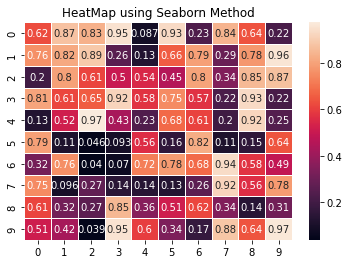

In [ ]:
newdf = final_df.copy()
newdf = np.random.rand(10, 10)
heat_map = sns.heatmap( newdf, linewidth = 1 , annot = True)
sns.set(rc = {'figure.figsize':(20,10)})
plt.title( "HeatMap using Seaborn Method" )
plt.show()

##Handling outliers


In [ ]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest

In [ ]:
print("Skewness - Cost: %f" % merged['Cost_int'].skew())
print("Kurtosis - Cost: %f" % merged['Cost_int'].kurt())

Skewness - Cost: 1.150702
Kurtosis - Cost: 1.556680


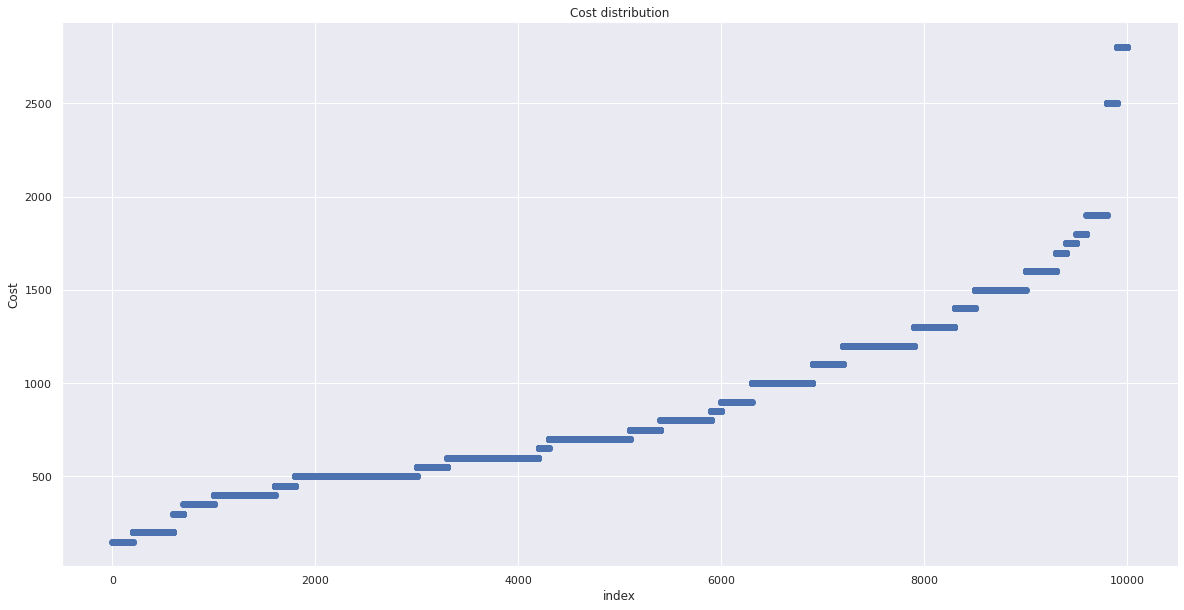

In [ ]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost_int'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
plt.rcParams['figure.figsize'] = [4, 4]
sns.despine()

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost_int'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost_int'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost_int'].values.reshape(-1, 1))

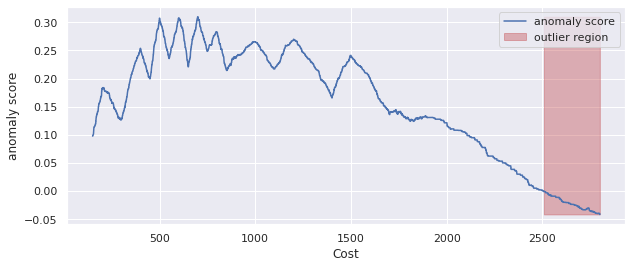

In [ ]:
#chart to visualize outliers
xx = np.linspace(merged['Cost_int'].min(), merged['Cost_int'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

Treating Outliers

In [ ]:
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[final_df['Cost_int']<= outlier_treatment_skew(df=final_df,
  feature='Cost_int')[1], 'Cost_int']=outlier_treatment_skew(df=final_df,feature='Cost_int')[1]

#upper limit capping
hotel.loc[final_df['Cost_int']>= outlier_treatment_skew(df=final_df,
  feature='Cost_int')[0], 'Cost_int']=outlier_treatment_skew(df=final_df,feature='Cost_int')[0]

##Clustering Data preprocessing

In [ ]:
clusterdf = final_df[['Restaurant','Cuisines','Cost_int','Rating']]

In [ ]:
clusterdf = pd.concat([clusterdf,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in clusterdf.iterrows():
  # iterate over the new columns 
  for column in list(clusterdf.columns):
      if column not in ['Restaurant','Cost_int','Cuisines','Rating']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          clusterdf.loc[i,column] = 1
        else:
          clusterdf.loc[i,column] = 0

In [ ]:
clusterdf.shape

(10000, 48)

In [ ]:
cluster_df1= clusterdf.groupby(['Restaurant'])['Cuisines'].sum().reset_index()
cluster_df2 = clusterdf.groupby(['Restaurant'])['Cost_int'].sum().reset_index()
cluster_df3 = clusterdf.groupby(['Restaurant'])['Rating'].sum().reset_index()

In [ ]:
cluster_new = pd.merge(cluster_df1, cluster_df2, on='Restaurant')

In [ ]:
new_df = pd.merge(cluster_new,cluster_df3, on='Restaurant')

In [ ]:
new_df['Cost_int'] = new_df['Cost_int']/100
new_df['Rating'] = new_df['Rating']/100

In [ ]:
new_df

,Restaurant,Cuisines,Cost_int,Rating
0,10 Downing Street,"North Indian, Chinese, ContinentalNorth Indian...",1900.0,3.80
1,13 Dhaba,North IndianNorth IndianNorth IndianNorth Indi...,450.0,3.48
2,"3B's - Buddies, Bar & Barbecue","North Indian, Mediterranean, EuropeanNorth Ind...",1100.0,4.76
3,AB's - Absolute Barbecues,"European, Mediterranean, North IndianEuropean,...",1500.0,4.88
4,Absolute Sizzlers,"Continental, American, ChineseContinental, Ame...",750.0,3.62
...,...,...,...,...
95,Urban Asia - Kitchen & Bar,"Asian, Thai, Chinese, Sushi, MomosAsian, Thai,...",1100.0,3.65
96,Yum Yum Tree - The Arabian Food Court,"North Indian, HyderabadiNorth Indian, Hyderaba...",1200.0,3.56
97,Zega - Sheraton Hyderabad Hotel,"Asian, SushiAsian, SushiAsian, SushiAsian, Sus...",1750.0,4.45
98,Zing's Northeast Kitchen,"North Eastern, MomosNorth Eastern, MomosNorth ...",550.0,3.65


In [ ]:
#creating a copy of restaturant dataset for clustering
cluster_df = final_df.copy()

In [ ]:
# Binning all the cuisines into their respective cuisine categories
cuisine_category_list=[]
for i in cluster_df['Cuisines']:   
  if (i=='Hyderabadi')|(i=='North Indian')|(i=='Modern Indian')|(i=='Biryani')|(i=='Mughlai')|(i=='South Indian')|(i=='Andhra')|(i=='North Eastern')|(i=='Seafood')|(i=='Goan'):
    cuisine_category_list.append('Indian Food')
  if (i=='Kebab')|(i=='BBQ')|(i=='Mughlai')|(i=='Salad')|(i=='Healthy Food'):
    cuisine_category_list.append('Starter Food')
  if (i=='Sushi')|(i=='Thai')|(i=='Indonesian')|(i=='Malaysian')|(i=='Chinese')| (i=='Asian')|(i=='Japanese'):
    cuisine_category_list.append('South-East Asian Food')
  if (i=='Lebanese')|(i=='Italian')|(i=='European')|(i=='Mediterranean')|(i=='American')|(i=='Arabian')|(i=='Mexican')|(i=='Spanish')|(i=='Continental'):
    cuisine_category_list.append('Continental food')
  if (i=='Momos')|(i=='Street Food')|(i=='Pizza')|(i=='Wraps')|(i=='Burger')|(i=='Fast Food')|(i=='Finger Food'):
    cuisine_category_list.append('Fast Food')
  if (i=='Bakery')|(i=='Beverages')|(i=='Desserts')|(i=='Juices')|(i=='Ice Cream')|(i=='Mithai')|(i=='Cafe'):
    cuisine_category_list.append('Beverges n Desserts')

In [ ]:
#Storing the cuisine category list in a dataframe
cuisine_category_df=pd.DataFrame(cuisine_category_list)
cuisine_category_df.columns=['cuisine']
cuisine_category_df

,cuisine
0,Continental food
1,Continental food
2,Continental food
3,Continental food
4,Continental food
...,...
1095,Indian Food
1096,Indian Food
1097,Indian Food
1098,Indian Food


In [ ]:
cuisine_category_df.value_counts()

cuisine              
Continental food         400
Indian Food              300
Fast Food                200
Beverges n Desserts      100
South-East Asian Food    100
dtype: int64

In [ ]:
#merging the cuisine category dataframe in our cluster data frame
cluster_df.reset_index(inplace=True)
cluster_df_new=pd.concat([cluster_df,cuisine_category_df],axis=1)
cluster_df_new.drop(['index'],axis=1,inplace=True)

In [ ]:
cluster_df_new

,Restaurant,Review,Rating,Rest_type,Cuisines,Cost_int,No of reviews,rating_group,price_range,cuisine
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",800,1,great,low,Continental food
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",800,3,great,low,Continental food
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",800,2,great,low,Continental food
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",800,1,great,low,Continental food
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",800,3,great,low,Continental food
...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3.0,NaN,"Chinese, Seafood",1000,53,average,mid,NaN
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,NaN,"Chinese, Seafood",1000,2,great,mid,NaN
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,NaN,"Chinese, Seafood",1000,65,below the average,mid,NaN
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4.0,NaN,"Chinese, Seafood",1000,13,great,mid,NaN


In [ ]:
# generating binary values using get_dummies
cluster_df_new = pd.get_dummies(cluster_df_new, columns=["cuisine"],prefix=None)

In [ ]:
cluster_df_new['cuisine_Continental food'].unique()

array([1, 0], dtype=uint8)

In [ ]:
cuisines_list= list(set(cluster_df_new.columns)-set(['Cost','Name']))

In [ ]:
cuisines_list

['Cuisines',
 'cuisine_Continental food',
 'Cost_int',
 'Rest_type',
 'Rating',
 'Review',
 'cuisine_Indian Food',
 'price_range',
 'cuisine_South-East Asian Food',
 'cuisine_Fast Food',
 'cuisine_Beverges n Desserts',
 'Restaurant',
 'No of reviews',
 'rating_group']

In [ ]:
final_cluster_df= cluster_df_new.groupby(['Restaurant'])[cuisines_list].sum().reset_index()

In [ ]:
final_cluster_df['Rating']= final_cluster_df['Rating']/100
final_cluster_df['Cost_int'] = final_cluster_df['Cost_int']/100

In [ ]:
final_cluster_df

,Restaurant,cuisine_Continental food,Cost_int,Rating,cuisine_Indian Food,cuisine_South-East Asian Food,cuisine_Fast Food,cuisine_Beverges n Desserts
0,10 Downing Street,0,1900.0,3.80,0,0,0,0
1,13 Dhaba,0,450.0,3.48,0,0,0,0
2,"3B's - Buddies, Bar & Barbecue",0,1100.0,4.76,0,0,0,0
3,AB's - Absolute Barbecues,0,1500.0,4.88,0,0,0,0
4,Absolute Sizzlers,0,750.0,3.62,0,0,0,0
...,...,...,...,...,...,...,...,...
95,Urban Asia - Kitchen & Bar,0,1100.0,3.65,0,0,0,0
96,Yum Yum Tree - The Arabian Food Court,0,1200.0,3.56,0,0,0,0
97,Zega - Sheraton Hyderabad Hotel,0,1750.0,4.45,0,0,0,0
98,Zing's Northeast Kitchen,0,550.0,3.65,0,0,0,0


In [ ]:
df_final_cluster = final_cluster_df.copy()

In [ ]:
df_final_cluster

,Restaurant,cuisine_Continental food,Cost_int,Rating,cuisine_Indian Food,cuisine_South-East Asian Food,cuisine_Fast Food,cuisine_Beverges n Desserts
0,10 Downing Street,0,1900.0,3.80,0,0,0,0
1,13 Dhaba,0,450.0,3.48,0,0,0,0
2,"3B's - Buddies, Bar & Barbecue",0,1100.0,4.76,0,0,0,0
3,AB's - Absolute Barbecues,0,1500.0,4.88,0,0,0,0
4,Absolute Sizzlers,0,750.0,3.62,0,0,0,0
...,...,...,...,...,...,...,...,...
95,Urban Asia - Kitchen & Bar,0,1100.0,3.65,0,0,0,0
96,Yum Yum Tree - The Arabian Food Court,0,1200.0,3.56,0,0,0,0
97,Zega - Sheraton Hyderabad Hotel,0,1750.0,4.45,0,0,0,0
98,Zing's Northeast Kitchen,0,550.0,3.65,0,0,0,0


In [ ]:
del df_final_cluster['Restaurant']

In [ ]:
df_final_cluster.set_index(["Cost_int", "Rating"], inplace = True, append = True, drop = False)

In [ ]:
df_final_cluster.drop(['Rating'], axis=1, inplace=True)
df_final_cluster.drop(['Cost_int'], axis=1, inplace=True)

In [ ]:
df_final_cluster.reset_index(inplace=True)

In [ ]:
df_final_cluster

,level_0,Cost_int,Rating,cuisine_Continental food,cuisine_Indian Food,cuisine_South-East Asian Food,cuisine_Fast Food,cuisine_Beverges n Desserts
0,0,1900.0,3.80,0,0,0,0,0
1,1,450.0,3.48,0,0,0,0,0
2,2,1100.0,4.76,0,0,0,0,0
3,3,1500.0,4.88,0,0,0,0,0
4,4,750.0,3.62,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95,95,1100.0,3.65,0,0,0,0,0
96,96,1200.0,3.56,0,0,0,0,0
97,97,1750.0,4.45,0,0,0,0,0
98,98,550.0,3.65,0,0,0,0,0


Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_final_cluster)
scaled_df = df_final_cluster.copy()
scaled_df = scaler.transform(df_final_cluster)

##Textual Data Preprocessing

In [ ]:
#creating a new df for text processing
df_sentiment = rst_reviews[['Reviewer','Restaurant','Rating','Review']]

In [ ]:
df_sentiment.sample(2)

,Reviewer,Restaurant,Rating,Review
6654,Kapil Ponnam,Aromas@11SIX,4.0,Have visited this place today and the food was...
8169,Ravi Teja,Delhi-39,1.0,I don't understand why do restaurants like the...


In [ ]:
# Lower Casing
df_sentiment['Review'] = df_sentiment['Review'].str.lower()

<ipython-input-99-05eb760d7087>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import string

In [ ]:
#removing punctuation
def clean_text(text):
  delete_dict = {sp_character: '' for sp_character in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  textArr = text1.split()
  text2 = ' '.join([w for w in textArr if (not w.isdigit() and (not w.isdigit() and len(w)>3))])

  return text2.lower()

In [ ]:
#removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_sentiment['Review'] = df_sentiment['Review'].apply(str)
df_sentiment['Review'] = df_sentiment['Review'].apply(clean_text)

<ipython-input-103-8db818a0ddd5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-103-8db818a0ddd5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
stopwords = set(stopwords.words('english'))
df_sentiment['Review'] = df_sentiment['Review'].apply(lambda x: ' '.join(word.lower() for word in x.split()))
df_sentiment['Review']= df_sentiment['Review'].str.replace('^a-zA-Z".,$%*', '')
df_sentiment['Review'] = df_sentiment['Review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))

<ipython-input-104-17f54e75e290>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-104-17f54e75e290>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-104-17f54e75e290>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-104-17f54e75e290>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
df_sentiment['Review'] = df_sentiment['Review'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-105-d9c8032ee71b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
df_sentiment['Sentiment'] = df_sentiment['Rating'].apply(
    lambda x: 1 if x >=df_sentiment['Rating'].mean() else 0)

<ipython-input-106-eaf618337540>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_sentiment

,Reviewer,Restaurant,Rating,Review,Sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,"[ambience, good, food, quite, good, saturday, ...",1
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,"[ambience, good, pleasant, evening, service, p...",1
2,Ashok Shekhawat,Beyond Flavours,5.0,"[must, great, food, great, ambience, thnx, ser...",1
3,Swapnil Sarkar,Beyond Flavours,5.0,"[soumen, arun, great, behavior, sincerety, goo...",1
4,Dileep,Beyond Flavours,5.0,"[food, goodwe, ordered, kodi, drumsticks, bask...",1
...,...,...,...,...,...
9995,Abhishek Mahajan,Chinese Pavilion,3.0,"[madhumathi, mahajan, well, start, nice, court...",0
9996,Sharad Agrawal,Chinese Pavilion,4.5,"[place, never, disappointed, food, courteous, ...",1
9997,Ramandeep,Chinese Pavilion,1.5,"[rating, mainly, chicken, bone, found, food, a...",0
9998,Nayana Shanbhag,Chinese Pavilion,4.0,"[personally, love, prefer, chinese, food, coup...",1


#####Bag of words

In [ ]:
import gensim
from gensim import corpora
#Bag of Words
tokenized_text = []
for token in df_sentiment['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

In [ ]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(df_sentiment["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


##K-Means Clustering

##**Elbow Method** (to determine optimal cluster value)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]

for i in range(1,15):
    km=KMeans(n_clusters=i,random_state=43)
    km.fit(df_final_cluster)
    wcss.append(km.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

Text(0, 0.5, 'WCSS')

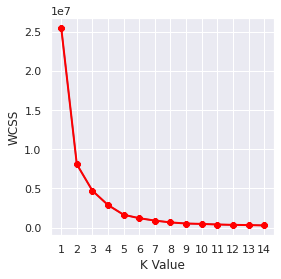

In [ ]:
#The elbow curve
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")

In [ ]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 6)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(df_final_cluster)
    scores.append(metrics.silhouette_score(df_final_cluster, km.labels_))

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



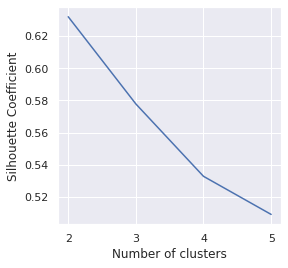

In [ ]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
X = df_final_cluster

In [ ]:
X .shape

(100, 8)

In [ ]:
X.iloc[: ,0]

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: level_0, Length: 100, dtype: int64

In [ ]:
df_final_cluster.columns

Index(['level_0', 'Cost_int', 'Rating', 'cuisine_Continental food',
       'cuisine_Indian Food', 'cuisine_South-East Asian Food',
       'cuisine_Fast Food', 'cuisine_Beverges n Desserts'],
      dtype='object')

Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
features = df_final_cluster.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(df_final_cluster[features])

PCA()

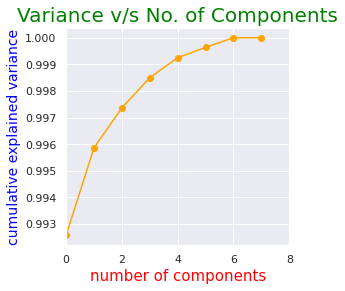

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(df_final_cluster[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(df_final_cluster[features])

Explained variation per principal component: [0.99257256 0.00328888 0.00150395]
Cumulative variance explained by 3 principal components: 99.74%


In [ ]:
print("original shape: ", df_final_cluster.shape)
print("transformed shape:", df_pca.shape)
     

original shape:  (100, 8)
transformed shape: (100, 3)


##**Silhouette Method**  (to determine optimal cluster value)

For n_clusters = 2 average silhouette_score is : 0.6356486408564671


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 average silhouette_score is : 0.5831932476047992
For n_clusters = 4 average silhouette_score is : 0.5402806509377583


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 average silhouette_score is : 0.5223462011378899
For n_clusters = 6 average silhouette_score is : 0.5197434590773495


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7 average silhouette_score is : 0.49562366656045753


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8 average silhouette_score is : 0.5244134726434132


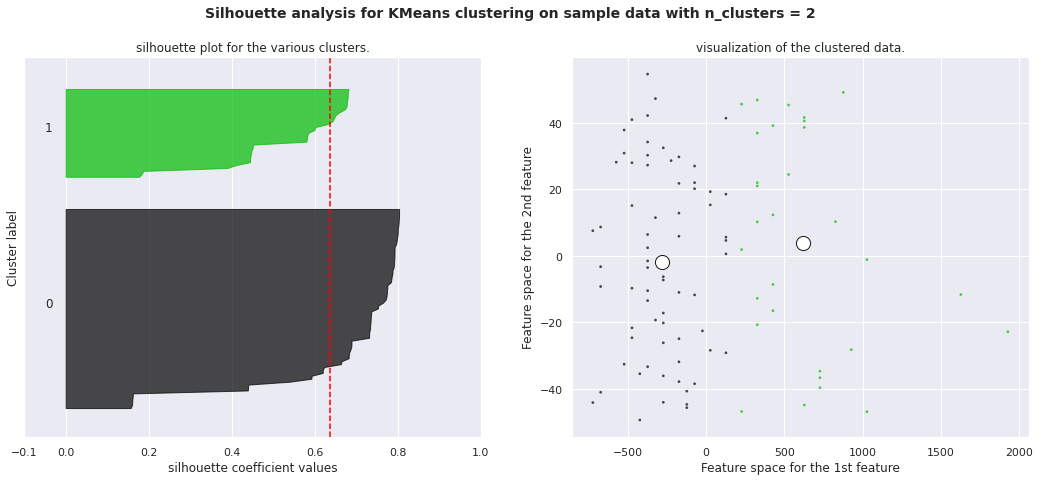

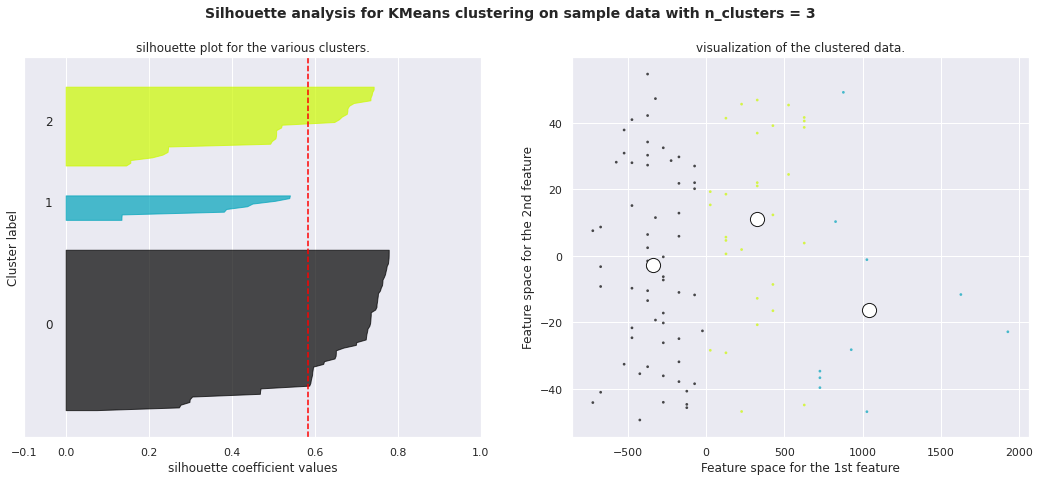

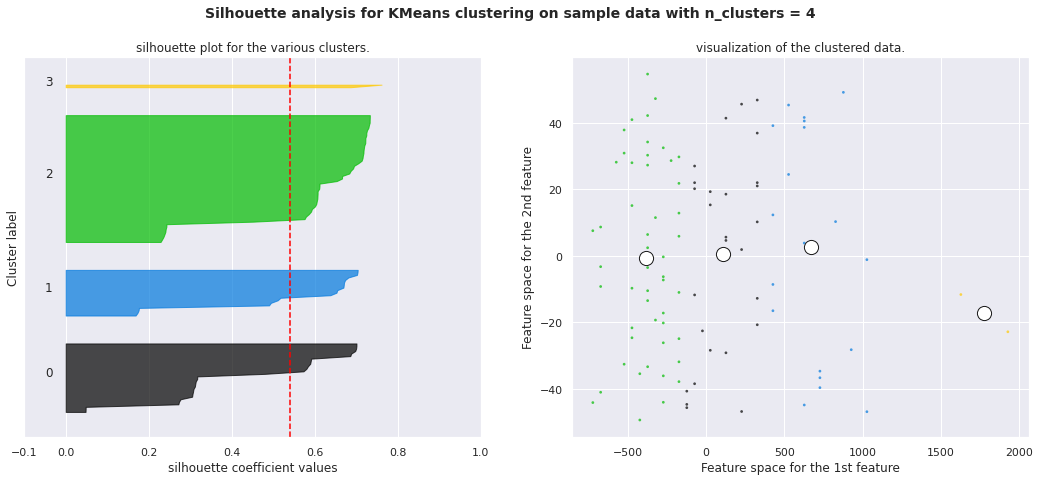

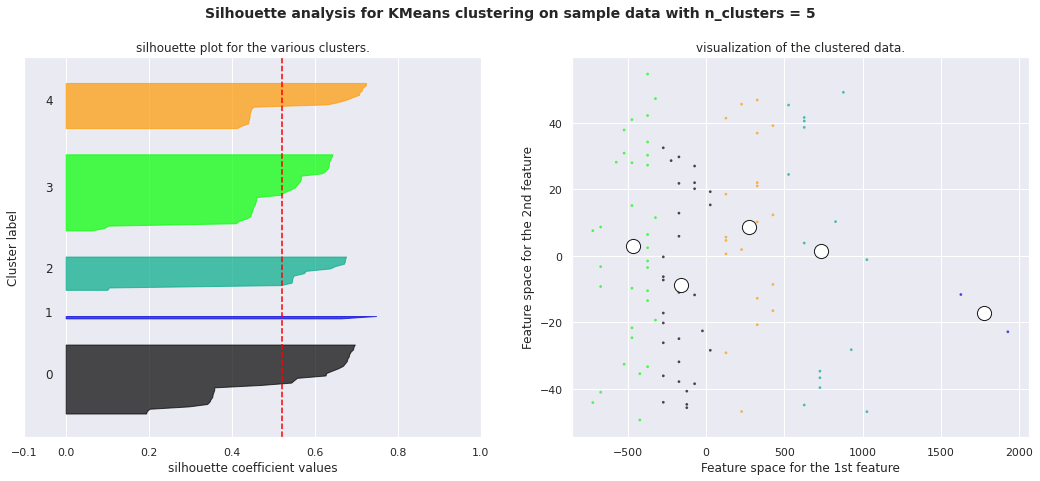

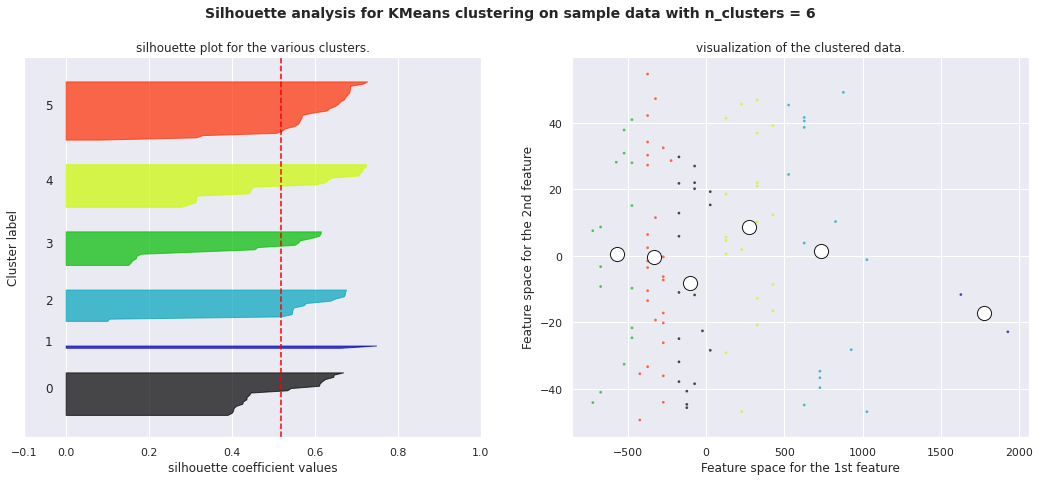

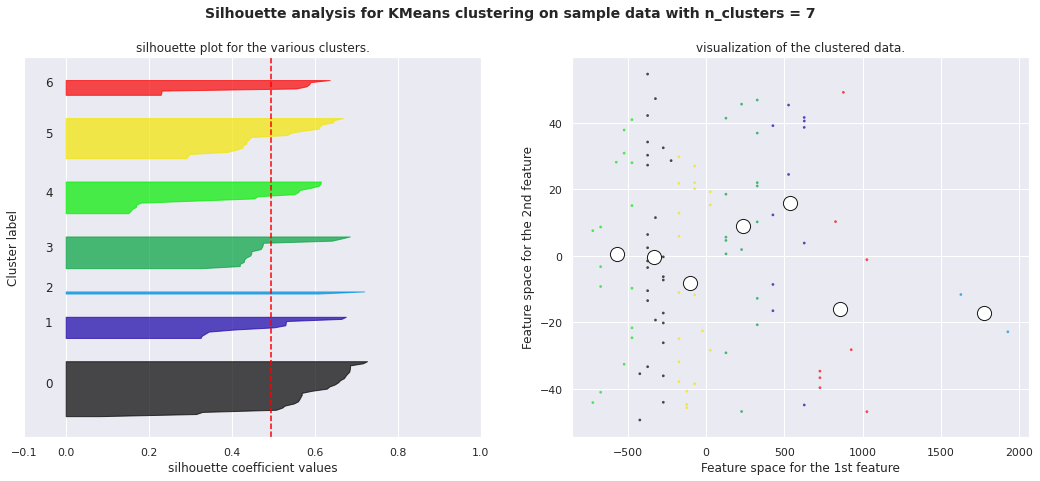

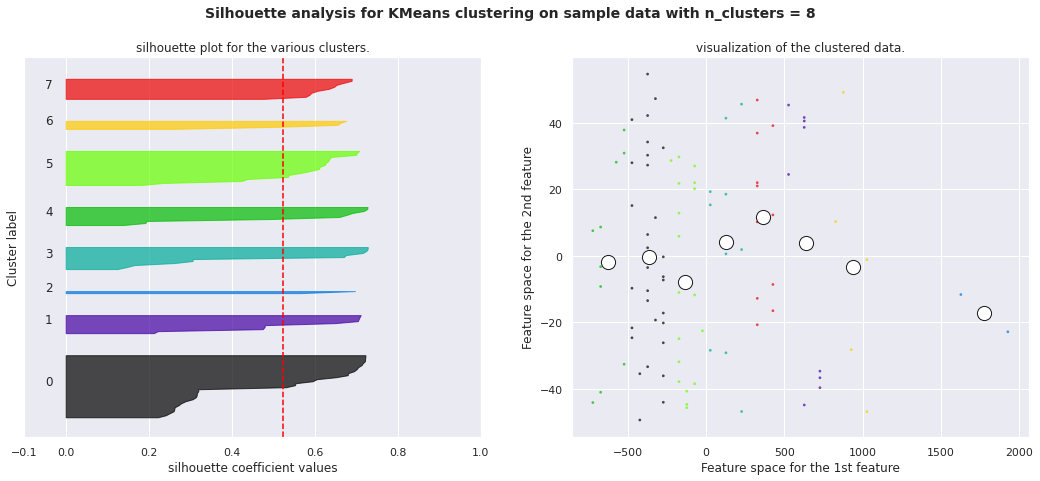

In [ ]:
#silhouette score
import matplotlib.cm as cm 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,9))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_final_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    #for i, c in enumerate(centers):
        #ax2.scatter(c[0], c[1], marker=' ' % i, alpha=1,
                    #s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
     

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



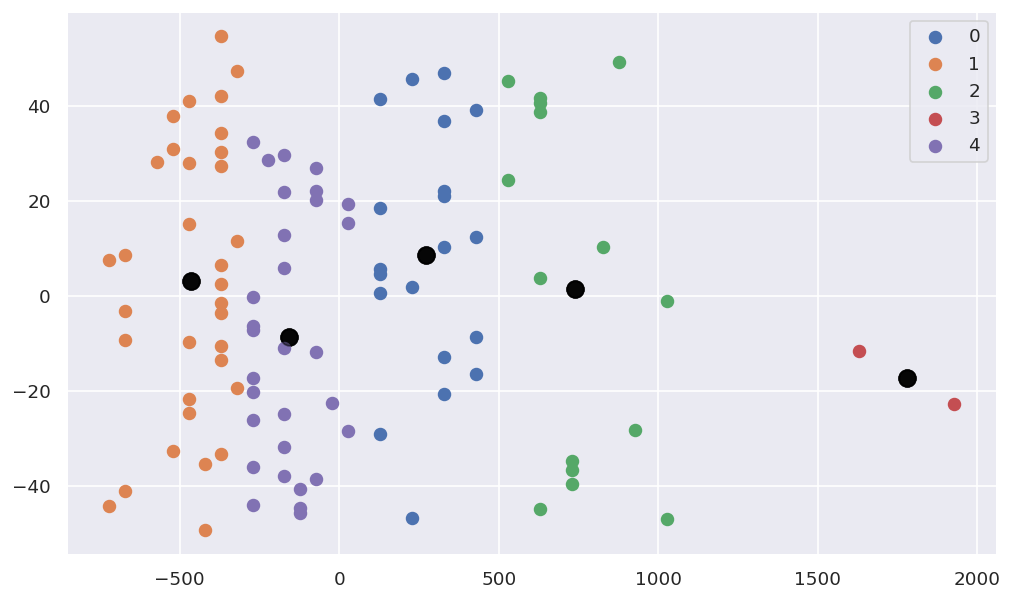

In [ ]:
 #vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

plt.legend()
plt.show()


##Agglomerative Clustering

##Dendogram to find the optimal number of clusters

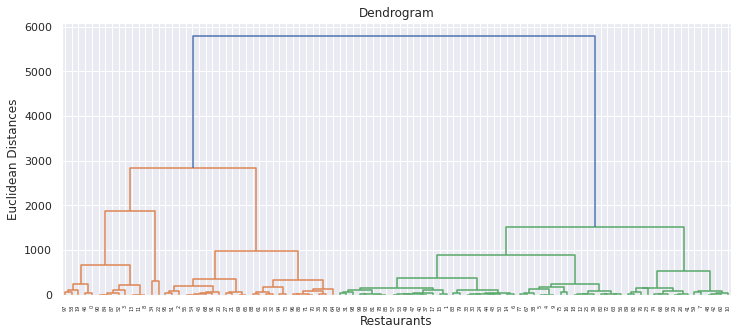

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()
     

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     

For n_clusters = 2, silhouette score is 0.6054138107964944
For n_clusters = 3, silhouette score is 0.5693488319635814
For n_clusters = 4, silhouette score is 0.5881286485336313
For n_clusters = 5, silhouette score is 0.5077667711314039
For n_clusters = 6, silhouette score is 0.48117701622476267
For n_clusters = 7, silhouette score is 0.5070161975110262
For n_clusters = 8, silhouette score is 0.5098272635219585
For n_clusters = 9, silhouette score is 0.5177677648937677
For n_clusters = 10, silhouette score is 0.5171598208955019
For n_clusters = 11, silhouette score is 0.500789006207922
For n_clusters = 12, silhouette score is 0.5013440959708678
For n_clusters = 13, silhouette score is 0.48872041950244066
For n_clusters = 14, silhouette score is 0.5033222335145819
For n_clusters = 15, silhouette score is 0.49909706868745785


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.8/

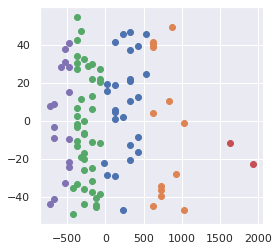

Silhouette Coefficient: 0.508
davies_bouldin_score 0.529


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

##Sentiment Analysis

###LDA Model

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



In [ ]:
def lemmatization(texts, allowed_postags= ['NOUN','ADJ']):
  output = []
  for sent in texts:
    doc = nlp(sent)
    output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

  return output

In [ ]:
df_sentiment['Review']

0       [ambience, good, food, quite, good, saturday, ...
1       [ambience, good, pleasant, evening, service, p...
2       [must, great, food, great, ambience, thnx, ser...
3       [soumen, arun, great, behavior, sincerety, goo...
4       [food, goodwe, ordered, kodi, drumsticks, bask...
                              ...                        
9995    [madhumathi, mahajan, well, start, nice, court...
9996    [place, never, disappointed, food, courteous, ...
9997    [rating, mainly, chicken, bone, found, food, a...
9998    [personally, love, prefer, chinese, food, coup...
9999    [checked, delicious, chinese, food, seen, nonv...
Name: Review, Length: 10000, dtype: object

In [ ]:
tokenized_reviews = df_sentiment['Review'] 

In [ ]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word = dictionary, num_topics =10, random_state = 100, chunksize=50, iterations=50)

In [ ]:
lda_model.print_topics()

[(0,
  '0.047*"chicken" + 0.040*"soup" + 0.039*"noodles" + 0.033*"rice" + 0.032*"ordered" + 0.025*"paneer" + 0.023*"paratha" + 0.020*"never" + 0.017*"cooked" + 0.016*"sweet"'),
 (1,
  '0.057*"’" + 0.038*"kebab" + 0.026*"s" + 0.022*"lamb" + 0.019*"t" + 0.019*"city" + 0.018*"it" + 0.017*"beautiful" + 0.014*"open" + 0.012*"needs"'),
 (2,
  '0.031*"sauce" + 0.024*"donuts" + 0.021*"dish" + 0.021*"well" + 0.016*"cheese" + 0.015*"restaurants" + 0.013*"thai" + 0.012*"coffee" + 0.011*"mouth" + 0.011*"love"'),
 (3,
  '0.056*"dishes" + 0.030*"love" + 0.027*"best" + 0.027*"parathas" + 0.027*"price" + 0.025*"worth" + 0.023*"disappointed" + 0.022*"place" + 0.021*"every" + 0.018*"quality"'),
 (4,
  '0.037*"main" + 0.034*"fried" + 0.031*"course" + 0.030*"tried" + 0.027*"dont" + 0.026*"cuisine" + 0.025*"chicken" + 0.021*"curry" + 0.016*"pretty" + 0.014*"burger"'),
 (5,
  '0.045*"place" + 0.035*"visit" + 0.035*"food" + 0.031*"best" + 0.029*"delicious" + 0.022*"amazing" + 0.022*"would" + 0.020*"hyderabad

In [ ]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.2 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models

In [ ]:
#Visualize the topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.290602  0.028551       1        1  23.181102
8     -0.083253 -0.270181       2        1  17.554711
9     -0.060824 -0.087390       3        1  10.923431
5     -0.223349  0.094591       4        1   9.071860
6      0.161779  0.134971       5        1   7.849808
0      0.135769 -0.216638       6        1   7.663936
4      0.165913 -0.074506       7        1   6.797876
2      0.124508  0.136942       8        1   6.352046
3     -0.053705  0.151524       9        1   5.633029
1      0.123764  0.102135      10        1   4.972201, topic_info=         Term         Freq        Total Category  logprob  loglift
9        good  6076.000000  6076.000000  Default  30.0000  30.0000
13      place  4831.000000  4831.000000  Default  29.0000  29.0000
569   chicken  3075.000000  3075.000000  Default  28.0000  28.0000
232     taste  2109.000000  2109.000000  Default  27.0000  27.0000
7        food  6265.000000  6265.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
397     foods    64.062697    64.768514  Topic10  -5.2755   2.9904
4608        ”    63.992761    64.698474  Topic10  -5.2766   2.9903
341     youll    63.977475    64.683834  Topic10  -5.2769   2.9903
1252    rated    62.682664    63.388684  Topic10  -5.2973   2.9901
4207    arena    72.217466    74.668107  Topic10  -5.1557   2.9679

[480 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
663       4  0.998467  absolutely
3822      8  0.984778      achari
678       2  0.996954    actually
773       2  0.994733       added
509       3  0.997844      almost
...     ...       ...         ...
342      10  0.993926       youre
845       9  0.994448       yummy
502       3  0.997488      zomato
395      10  0.998382           ’
4608     10  0.989204           ”

[649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 10, 6, 7, 1, 5, 3, 4, 2])

In [ ]:
lda_topics = lda_model.print_topics()

In [ ]:
lda_topics

[(0,
  '0.047*"chicken" + 0.040*"soup" + 0.039*"noodles" + 0.033*"rice" + 0.032*"ordered" + 0.025*"paneer" + 0.023*"paratha" + 0.020*"never" + 0.017*"cooked" + 0.016*"sweet"'),
 (1,
  '0.057*"’" + 0.038*"kebab" + 0.026*"s" + 0.022*"lamb" + 0.019*"t" + 0.019*"city" + 0.018*"it" + 0.017*"beautiful" + 0.014*"open" + 0.012*"needs"'),
 (2,
  '0.031*"sauce" + 0.024*"donuts" + 0.021*"dish" + 0.021*"well" + 0.016*"cheese" + 0.015*"restaurants" + 0.013*"thai" + 0.012*"coffee" + 0.011*"mouth" + 0.011*"love"'),
 (3,
  '0.056*"dishes" + 0.030*"love" + 0.027*"best" + 0.027*"parathas" + 0.027*"price" + 0.025*"worth" + 0.023*"disappointed" + 0.022*"place" + 0.021*"every" + 0.018*"quality"'),
 (4,
  '0.037*"main" + 0.034*"fried" + 0.031*"course" + 0.030*"tried" + 0.027*"dont" + 0.026*"cuisine" + 0.025*"chicken" + 0.021*"curry" + 0.016*"pretty" + 0.014*"burger"'),
 (5,
  '0.045*"place" + 0.035*"visit" + 0.035*"food" + 0.031*"best" + 0.029*"delicious" + 0.022*"amazing" + 0.022*"would" + 0.020*"hyderabad

##Conclusion

1. In this unsupervised machine learning project, we looked into multiple unsupervised models and sentiment analysis. We started with loading the data, inspecting the data and Data Cleaning
2. Through Exploratory Data Analysis, we visualized the data through bar plot, pie chart, wordcloud and distplots.
3. We have seen a correlation matrix is a table showing correlation coefficients between variables through heatmap.
4. We have the capped outliers with the highest and lowest limit using IQR method.
5. During data pre-processing, we have transformed raw data into an understandable format for ML algorithms.
6. For textual data pre-processing, NLP pipeline include steps such as sentence segmentation, word tokenization, lowercasing, stemming or lemmatization, stop word removal and spelling correction.
7. Principal Component Analysis was used to reduce the dimensionality of large datasets.
7. Models like K-means was used for grouping the data into clusters and visualizing them in clusters. Elbow method and Silhouette score was used to find the optimum number of clusters. 
8. Agglomerative Clustering is a hierarchical clustering algorithm that was used to cluster the data points. Dendrogram plot was used to find the optimal number of clusters.

9. For Sentiment Analysis, topic modeling was a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is the algorithm that was used for topic modelling and extracted good quality topics that are clear, segregated and meaningful.
